In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Example 2: Extracellular response of synaptic input
This is an example of **``LFPy``** running in a **``Jupyter notebook``**. To run through this example code and produce output, press **``<shift-Enter>``** in each code block below.

First step is to import ``LFPy`` and other packages for analysis and plotting:

In [2]:
import LFPy

Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [3]:
cellParameters = {
    'morphology': 'morphologies/L5_Mainen96_LFPy.hoc',
    'tstart': -50,
    'tstop': 100,
    'dt': 2**-4,
    'passive': True,
}

synapseParameters = {
    'syntype': 'Exp2Syn',
    'e': 0.,
    'tau1': 0.5,
    'tau2': 2.0,
    'weight': 0.005,
    'record_current': True,
}

z = mgrid[-400:1201:100]
electrodeParameters = {
    'x': zeros(z.size),
    'y': zeros(z.size),
    'z': z,
    'sigma': 0.3,
}

Then, create the **`cell`**, **`synapse`** and **`electrode`** objects using the
**`LFPy.Cell`**, **`LFPy.Synapse`**, **`LFPy.RecExtElectrode`** classes.

In [4]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=-10, y=0, z=0)
cell.set_rotation(z=np.pi)

synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=800),
                       **synapseParameters)
synapse.set_spike_times(array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(cell, **electrodeParameters)

Run the simulation using **`cell.simulate()`** probing the extracellular potential with 
the additional keyword argument **`probes=[electrode]`**

In [5]:
cell.simulate(probes=[electrode])

Then plot the **somatic potential** and the **prediction** obtained using the `RecExtElectrode` instance 
(now accessible as `electrode.data`):

Text(0.5, 0, 'time (ms)')

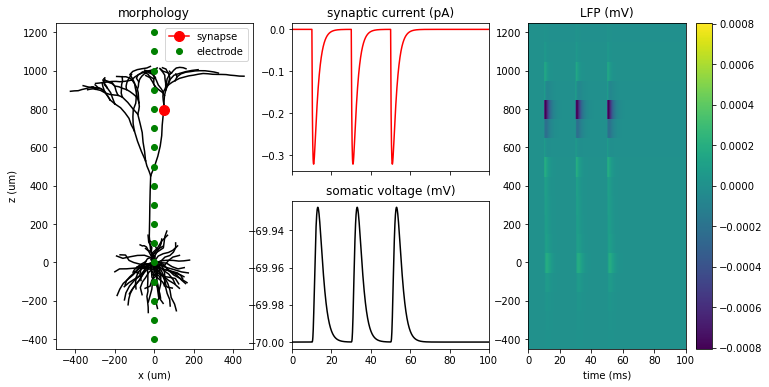

In [6]:
fig = figure(figsize=(12, 6))
gs = GridSpec(2, 3)

ax0 = fig.add_subplot(gs[:, 0])
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    ax0.plot(np.r_[cell.x[idx, 0], cell.x[idx, 1][-1]],
             np.r_[cell.z[idx, 0], cell.z[idx, 1][-1]],
             color='k', label='__nolabel__')
ax0.plot([cell.synapses[0].x], [cell.synapses[0].z], 
         color='r', marker='o', markersize=10,
         label='synapse')
ax0.plot(electrode.x, electrode.z, '.', marker='o', color='g', 
         label='electrode')
ax0.axis([-500, 500, -450, 1250])
ax0.legend()
ax0.set_xlabel('x (um)')
ax0.set_ylabel('z (um)')
ax0.set_title('morphology')

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(cell.tvec, synapse.i, 'r'), title('synaptic current (pA)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax2.plot(cell.tvec, cell.somav, 'k'), title('somatic voltage (mV)')

ax3 = fig.add_subplot(gs[:, 2], sharey=ax0, sharex=ax1)
im = ax3.pcolormesh(cell.tvec, electrode.z, electrode.data,
                 vmin=-abs(electrode.data).max(), vmax=abs(electrode.data).max(),
                 shading='auto')
colorbar(im)
ax3.set_title('LFP (mV)')
ax3.set_xlabel('time (ms)')

#savefig('LFPy-example-02.pdf', dpi=300)